In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.utils.class_weight import compute_class_weight

In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "data"));

In [3]:
df = pd.read_csv("combined-season-data.csv", index_col=False);

In [4]:
df.head()

,season,GW,at_home,player_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,assists_pgw,...,threat_pgw,threat_rlf,threat_rsf,total_points_pgw,total_points_rlf,total_points_rsf,yellow_cards_pgw,yellow_cards_rlf,yellow_cards_rsf,total_points
0,2016,1,0,1,4,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,2016,1,1,2,17,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,2016,1,1,4,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2
3,2016,1,0,6,13,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,2016,1,1,7,20,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,71132.0,2017.063305,0.902744,2016.0,2016.00000,2017.000000,2018.000000,2019.0
GW,71132.0,19.506144,11.348698,1.0,9.00000,20.000000,30.000000,38.0
at_home,71132.0,0.499958,0.500004,0.0,0.00000,0.000000,1.000000,1.0
player_id,71132.0,487.087921,295.550779,1.0,239.00000,478.000000,700.000000,1211.0
opponent_id,71132.0,12.042934,7.275230,1.0,5.00000,11.000000,18.000000,29.0
champion_ls,71132.0,0.050273,0.218509,0.0,0.00000,0.000000,0.000000,1.0
top5_ls,71132.0,0.250211,0.433137,0.0,0.00000,0.000000,1.000000,1.0
bottom5_ls,71132.0,0.249480,0.432715,0.0,0.00000,0.000000,0.000000,1.0
promoted_ts,71132.0,0.149722,0.356801,0.0,0.00000,0.000000,0.000000,1.0
assists_pgw,71132.0,0.039476,0.211277,0.0,0.00000,0.000000,0.000000,3.0


In [6]:
df.columns

Index(['season', 'GW', 'at_home', 'player_id', 'opponent_id', 'champion_ls',
       'top5_ls', 'bottom5_ls', 'promoted_ts', 'assists_pgw', 'assists_rlf',
       'assists_rsf', 'bonus_pgw', 'bonus_rlf', 'bonus_rsf', 'bps_pgw',
       'bps_rlf', 'bps_rsf', 'clean_sheets_pgw', 'clean_sheets_rlf',
       'clean_sheets_rsf', 'creativity_pgw', 'creativity_rlf',
       'creativity_rsf', 'goals_conceded_pgw', 'goals_conceded_rlf',
       'goals_conceded_rsf', 'goals_scored_pgw', 'goals_scored_rlf',
       'goals_scored_rsf', 'ict_index_pgw', 'ict_index_rlf', 'ict_index_rsf',
       'influence_pgw', 'influence_rlf', 'influence_rsf', 'minutes_pgw',
       'minutes_rlf', 'minutes_rsf', 'opponent_form', 'own_goals_pgw',
       'own_goals_rlf', 'own_goals_rsf', 'penalties_missed_pgw',
       'penalties_missed_rlf', 'penalties_missed_rsf', 'penalties_saved_pgw',
       'penalties_saved_rlf', 'penalties_saved_rsf', 'player_form',
       'red_cards_pgw', 'red_cards_rlf', 'red_cards_rsf', 'result',
   

In [7]:
df.dtypes

season                    int64
GW                        int64
at_home                   int64
player_id                 int64
opponent_id               int64
champion_ls               int64
top5_ls                   int64
bottom5_ls                int64
promoted_ts               int64
assists_pgw             float64
assists_rlf               int64
assists_rsf               int64
bonus_pgw               float64
bonus_rlf                 int64
bonus_rsf                 int64
bps_pgw                 float64
bps_rlf                   int64
bps_rsf                   int64
clean_sheets_pgw        float64
clean_sheets_rlf          int64
clean_sheets_rsf          int64
creativity_pgw          float64
creativity_rlf          float64
creativity_rsf          float64
goals_conceded_pgw      float64
goals_conceded_rlf        int64
goals_conceded_rsf        int64
goals_scored_pgw        float64
goals_scored_rlf          int64
goals_scored_rsf          int64
                         ...   
own_goal

In [8]:
df.isnull().sum()

season                  0
GW                      0
at_home                 0
player_id               0
opponent_id             0
champion_ls             0
top5_ls                 0
bottom5_ls              0
promoted_ts             0
assists_pgw             0
assists_rlf             0
assists_rsf             0
bonus_pgw               0
bonus_rlf               0
bonus_rsf               0
bps_pgw                 0
bps_rlf                 0
bps_rsf                 0
clean_sheets_pgw        0
clean_sheets_rlf        0
clean_sheets_rsf        0
creativity_pgw          0
creativity_rlf          0
creativity_rsf          0
goals_conceded_pgw      0
goals_conceded_rlf      0
goals_conceded_rsf      0
goals_scored_pgw        0
goals_scored_rlf        0
goals_scored_rsf        0
                       ..
own_goals_pgw           0
own_goals_rlf           0
own_goals_rsf           0
penalties_missed_pgw    0
penalties_missed_rlf    0
penalties_missed_rsf    0
penalties_saved_pgw     0
penalties_sa

In [9]:
df.duplicated().sum()

0

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

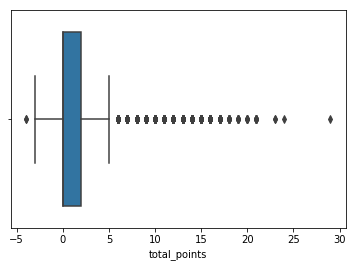

In [11]:
sns.boxplot(x=df['total_points'])

(array([3.4600e+02, 5.9859e+04, 4.3870e+03, 5.1110e+03, 8.6700e+02,
        4.3000e+02, 1.1000e+02, 1.8000e+01, 3.0000e+00, 1.0000e+00]),
 array([-4. , -0.7,  2.6,  5.9,  9.2, 12.5, 15.8, 19.1, 22.4, 25.7, 29. ]),
 <a list of 10 Patch objects>)

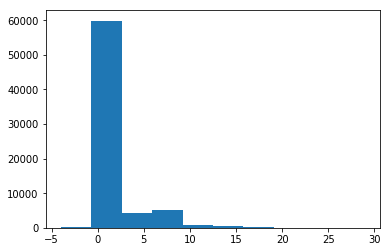

In [12]:
plt.hist(df["total_points"])

In [13]:
distribution_df = pd.DataFrame();

In [14]:
distribution_df["points"] = np.unique(df["total_points"])

In [15]:
def countPoints(point):
    return df[df["total_points"] == point].shape[0]

In [16]:
distribution_df["data_count"] = distribution_df["points"].apply(lambda point: countPoints(point))

In [17]:
distribution_df["data_percent"] = distribution_df["data_count"].apply(lambda count: round(count / df.shape[0] * 100, 3))

In [18]:
distribution_df

,points,data_count,data_percent
0,-4,2,0.003
1,-3,16,0.022
2,-2,86,0.121
3,-1,242,0.340
4,0,39638,55.725
5,1,10810,15.197
6,2,9411,13.230
7,3,2588,3.638
8,4,579,0.814
9,5,1220,1.715


In [19]:
outlier_threshold = 0.3;

In [20]:
outlier_points = list(distribution_df[distribution_df["data_percent"] <= outlier_threshold]["points"])

In [21]:
outlier_points

[-4, -3, -2, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 29]

In [22]:
for outlier_point in outlier_points:
    instances = df[df["total_points"] == outlier_point];
    
    for index, row in instances.iterrows():
        player_id = row["player_id"];
        opponent_id = row["opponent_id"];
        
        check_df = df[(df["player_id"] == player_id) & (df["opponent_id"] == opponent_id)]
        if (check_df.shape[0] == 1):
            df = df.drop(df[df["total_points"] == outlier_point].index);
            df.reset_index(inplace=True, drop=True);
        else:
            average_score = np.mean(check_df["total_points"])
            df.loc[(df["player_id"] == player_id) & (df["opponent_id"] == opponent_id) & 
                   (df["total_points"] == outlier_point), 'total_points'] = average_score;
            
    print("Completed outlier point {}".format(outlier_point))

Completed outlier point -4
Completed outlier point -3
Completed outlier point -2
Completed outlier point 13
Completed outlier point 14
Completed outlier point 15
Completed outlier point 16
Completed outlier point 17
Completed outlier point 18
Completed outlier point 19
Completed outlier point 20
Completed outlier point 21
Completed outlier point 23
Completed outlier point 24
Completed outlier point 29


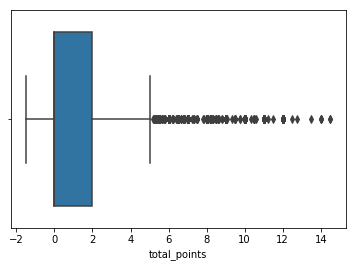

In [23]:
sns.boxplot(x=df['total_points'])

In [24]:
df.columns

Index(['season', 'GW', 'at_home', 'player_id', 'opponent_id', 'champion_ls',
       'top5_ls', 'bottom5_ls', 'promoted_ts', 'assists_pgw', 'assists_rlf',
       'assists_rsf', 'bonus_pgw', 'bonus_rlf', 'bonus_rsf', 'bps_pgw',
       'bps_rlf', 'bps_rsf', 'clean_sheets_pgw', 'clean_sheets_rlf',
       'clean_sheets_rsf', 'creativity_pgw', 'creativity_rlf',
       'creativity_rsf', 'goals_conceded_pgw', 'goals_conceded_rlf',
       'goals_conceded_rsf', 'goals_scored_pgw', 'goals_scored_rlf',
       'goals_scored_rsf', 'ict_index_pgw', 'ict_index_rlf', 'ict_index_rsf',
       'influence_pgw', 'influence_rlf', 'influence_rsf', 'minutes_pgw',
       'minutes_rlf', 'minutes_rsf', 'opponent_form', 'own_goals_pgw',
       'own_goals_rlf', 'own_goals_rsf', 'penalties_missed_pgw',
       'penalties_missed_rlf', 'penalties_missed_rsf', 'penalties_saved_pgw',
       'penalties_saved_rlf', 'penalties_saved_rsf', 'player_form',
       'red_cards_pgw', 'red_cards_rlf', 'red_cards_rsf', 'result',
   

In [25]:
df.drop(["result"], inplace=True, axis=1)

In [26]:
df.shape

(70773, 69)

In [27]:
df.to_csv("final-preprocessed-data.csv", index=False);